In [16]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy

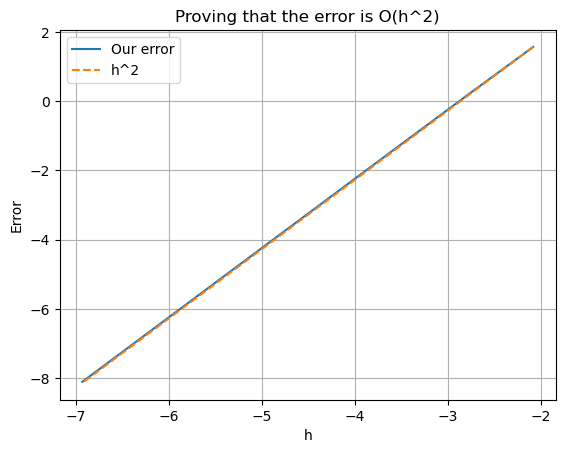

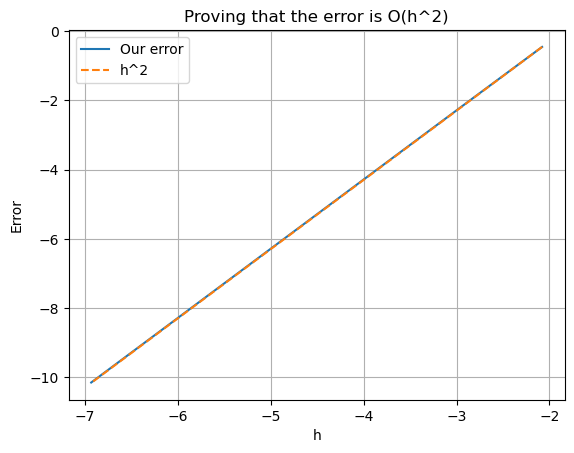

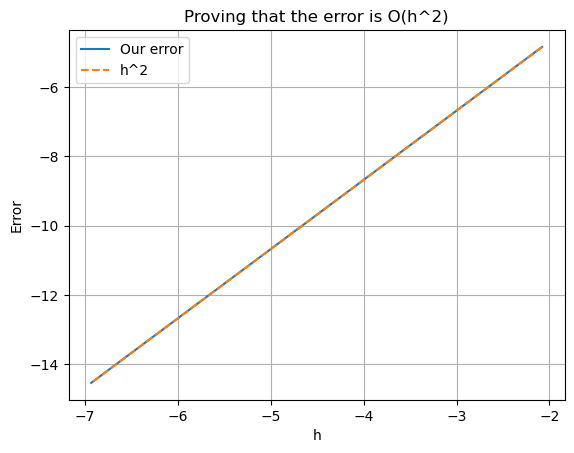

In [17]:
Nvec = np.linspace(3,10,7).astype(int)
Nvec = 2**Nvec
errorvec=[[],[],[]]
hvec = 1/Nvec

for N in Nvec:
    first_row = np.zeros(N)
    first_row[:2] = [-2, 1]
    T = la.toeplitz(first_row)
    T[N-1,N-2] = 2
    T = T/((1/N)**2)

    eig = np.array(scipy.linalg.eigvals(T))
    eig = np.sort(eig)
    caleig = eig[-3:]
    trueeig = [-(math.pi*5/2)**2, -(math.pi*3/2)**2,-(math.pi*1/2)**2 ]

    for i in range(len(errorvec)):
         errorvec[i].append(np.abs(caleig[i]-trueeig[i]))

for i in range(3):
    plt.plot(np.log(hvec), np.log(errorvec[i]))
    plt.plot(np.log(hvec), 2*np.log(hvec) + np.log(errorvec[i][0])-2*np.log(hvec[0]), '--')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.legend(['Our error', 'h^2'])
    plt.title('Proving that the error is O(h^2)')
    plt.grid()
    plt.show()



This belongs to value(-2.4673990626297617+0j)


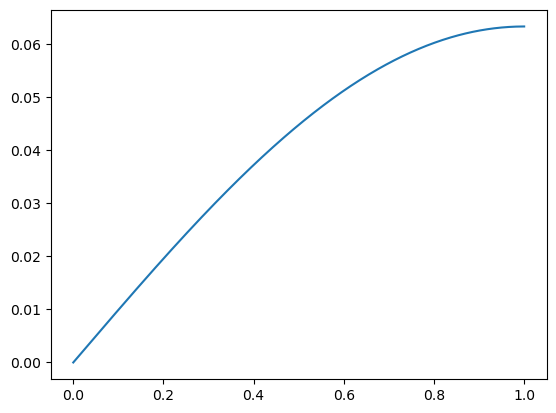

This belongs to value(-22.206444865545656+0j)


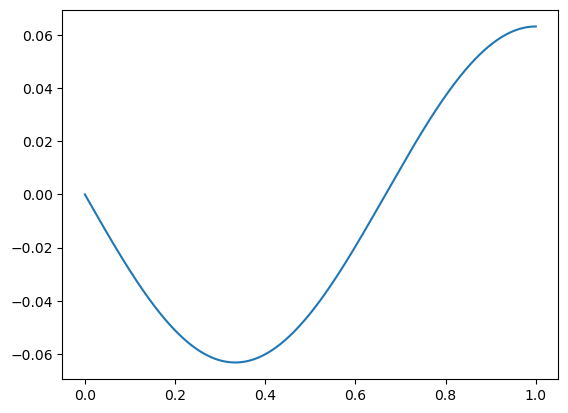

This belongs to value(-61.683754081349214+0j)


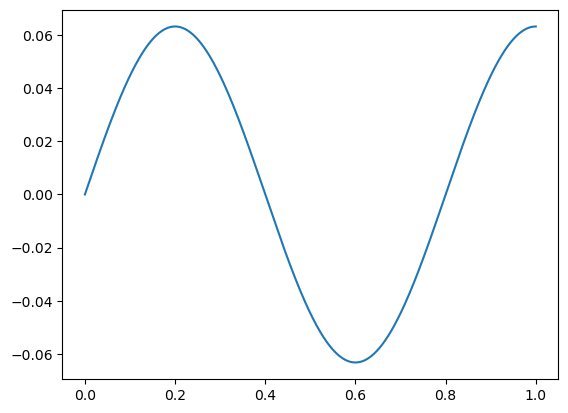

In [19]:
N = 499
Xgrid = np.linspace(0,1,N+1)

first_row = np.zeros(N)
first_row[:2] = [-2, 1]
T = la.toeplitz(first_row)
T[N-1,N-2] = 2
T = T/((1/N)**2)

eigvals, eigvectors = scipy.linalg.eig(T)
eig_dict = {eigvals[i]: np.insert(eigvectors[:,i],0,0) for i in range(len(eigvals))}

eigvals = np.sort(eigvals)[::-1]
for i in range(3):  
    plt.plot(Xgrid, (eig_dict[eigvals[i]]))
    print('This belongs to value' + str(eigvals[i]))
    plt.show()